In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/Users/Samet/Desktop/hw/heart_statlog_cleveland_hungary_final.csv')
data

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [3]:
data.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

no need encoding

In [4]:
data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


<AxesSubplot: >

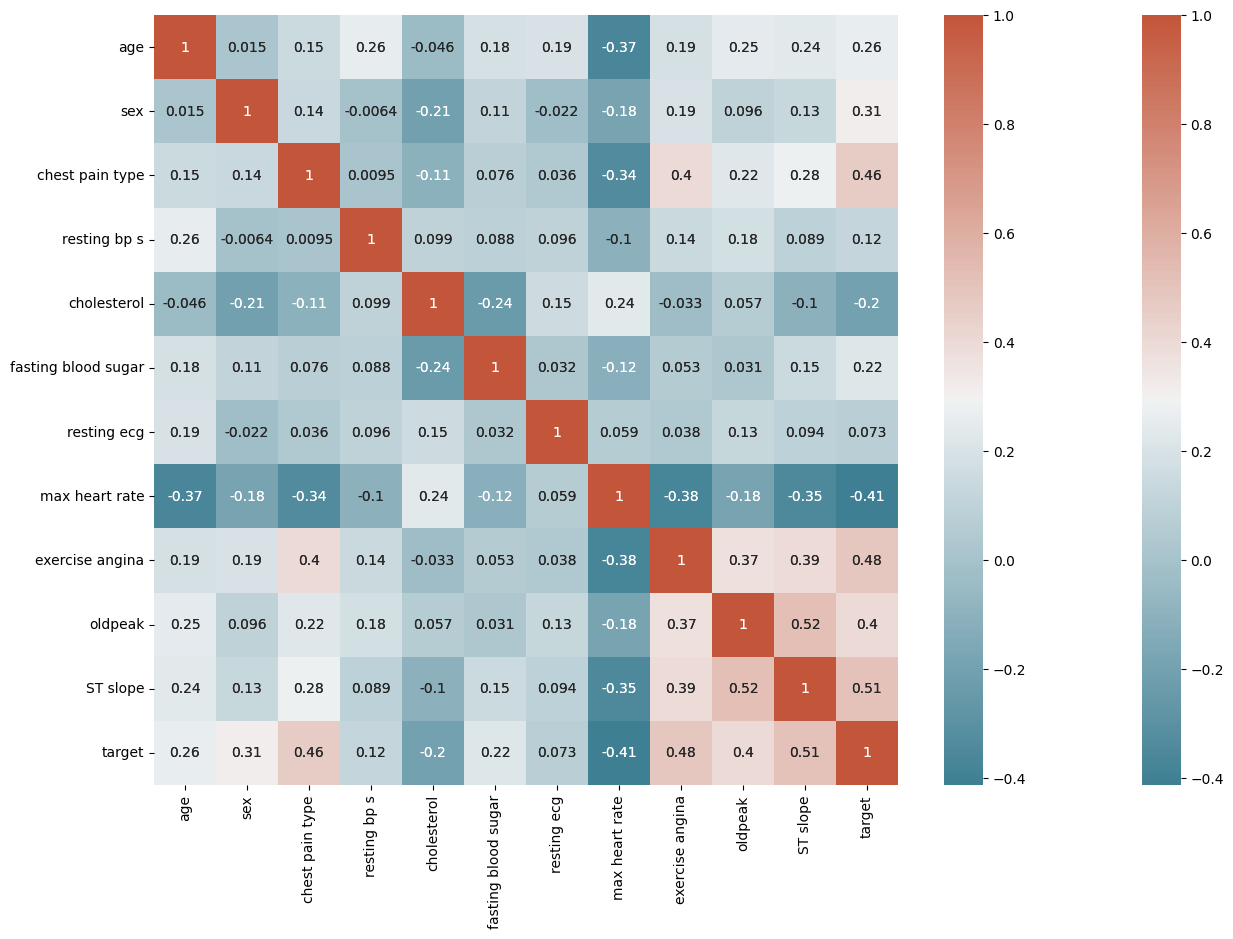

In [5]:
corr = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

#### Negative correlations with "target":
cholesterol and max heart rate <br>
Note: The rest is positively correlated.

### Age analysis

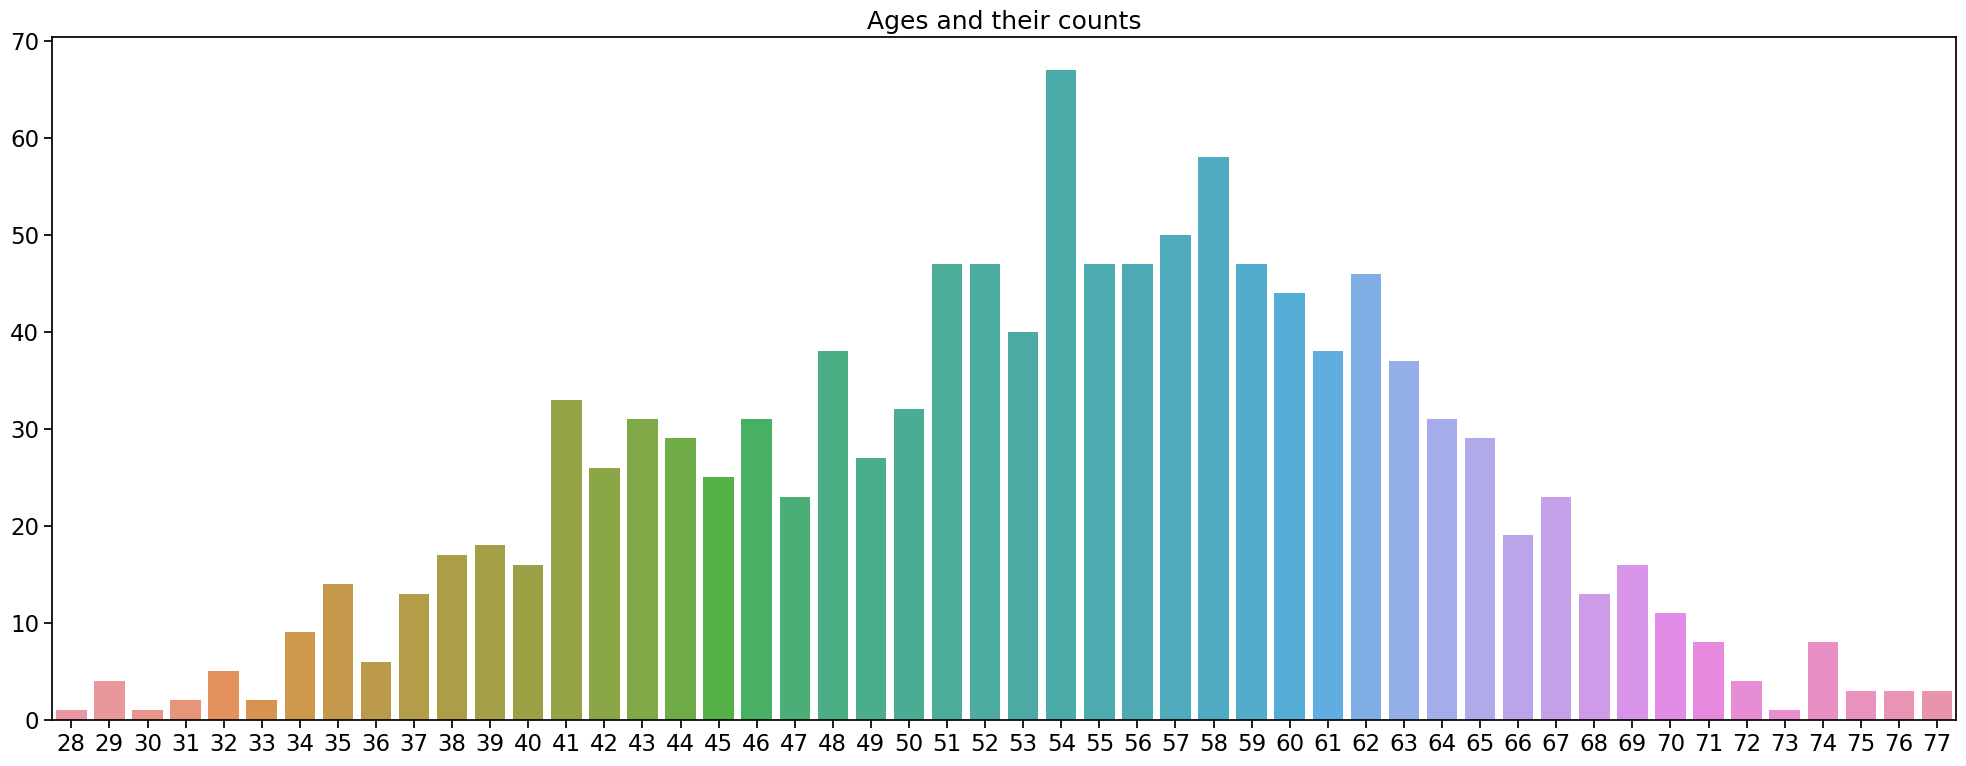

In [18]:
plt.figure(figsize=(20,8))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=data.age.value_counts().index,y=data.age.value_counts().values)
plt.title("Ages and their counts")
plt.tight_layout()

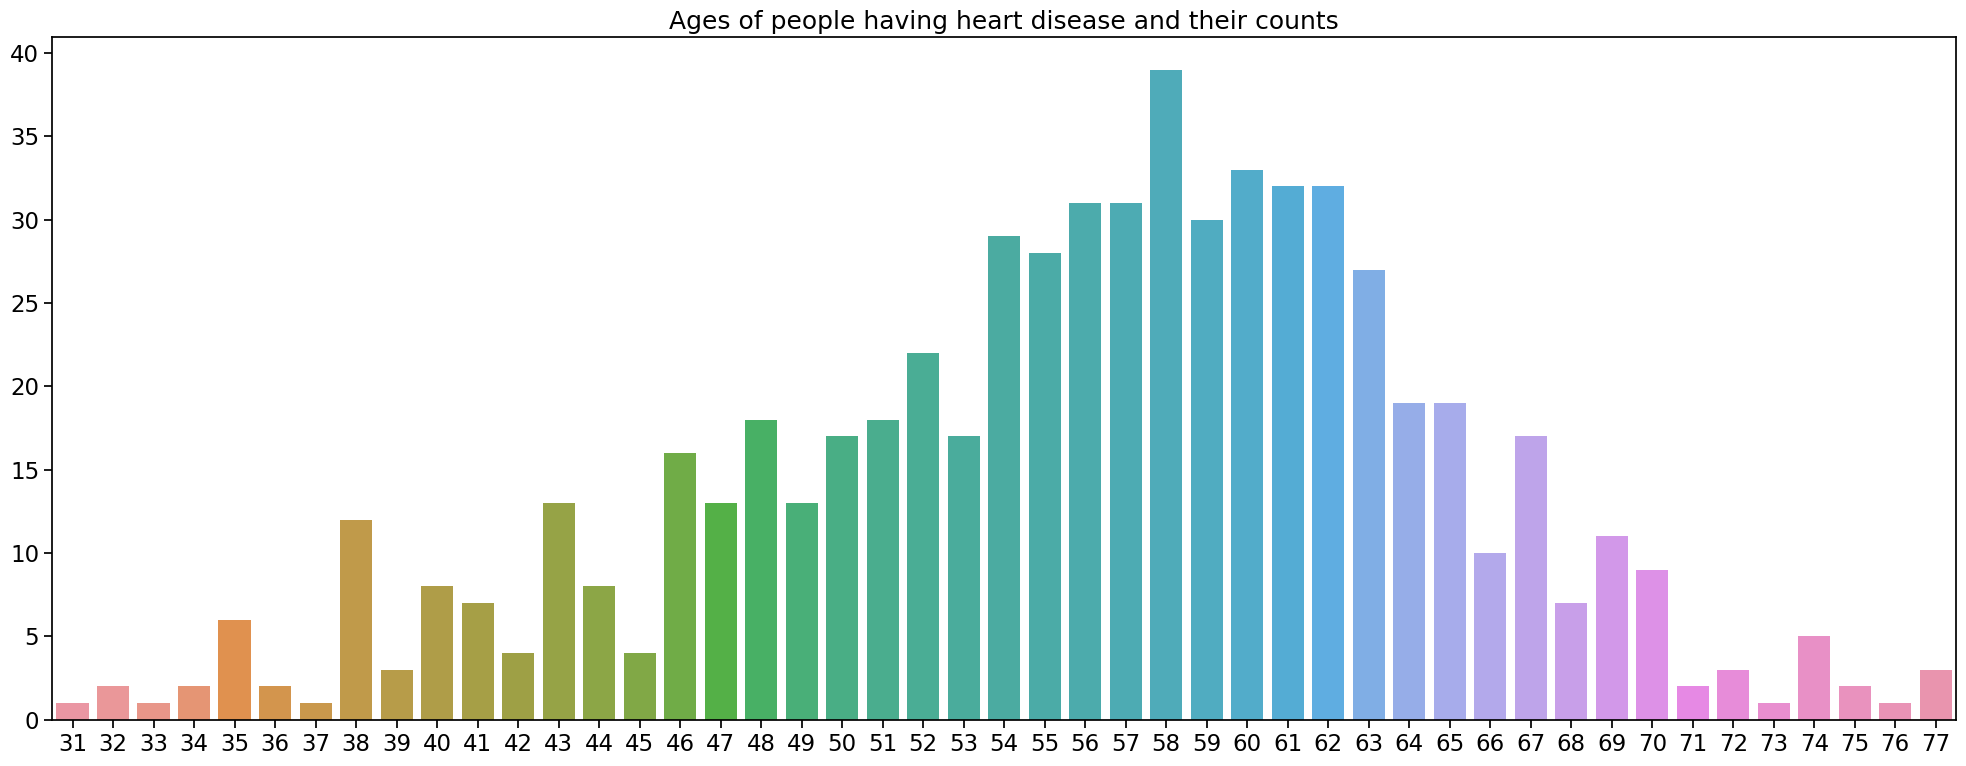

In [31]:
plt.figure(figsize=(20,8))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=data.age[data.target==1].value_counts().index,y=data.age[data.target==1].value_counts().values)
plt.title("Ages of people having heart disease and their counts")
plt.tight_layout()

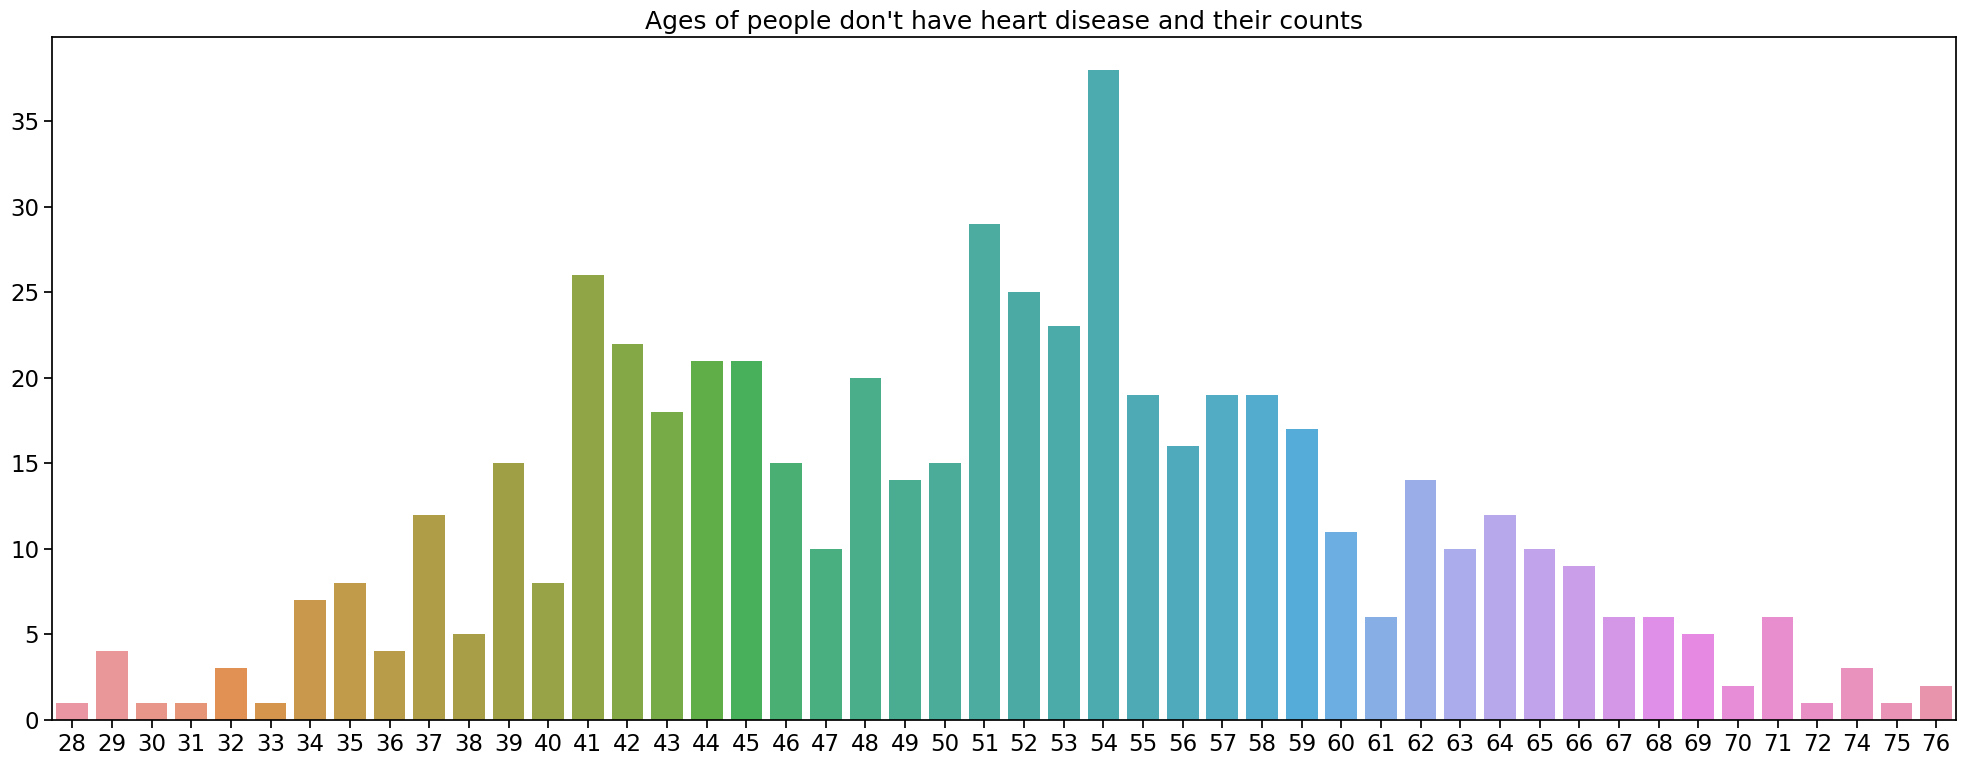

In [32]:
plt.figure(figsize=(20,8))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=data.age[data.target==0].value_counts().index,y=data.age[data.target==0].value_counts().values)
plt.title("Ages of people don't have heart disease and their counts")
plt.tight_layout()

### Sex analysis

In [51]:
cond0=data["sex"]==0
cond1=data["sex"]==1
condhd0=data[data.target==1]["sex"]==0
condhd1=data[data.target==1]["sex"]==1
conddhd0=data[data.target==0]["sex"]==0
conddhd1=data[data.target==0]["sex"]==1
f_count=len(data[cond0])
m_count=len(data[cond1])
hdf_count=len(data[data.target==1][condhd0])
hdm_count=len(data[data.target==1][condhd1])
dhdf_count=len(data[data.target==0][conddhd0])
dhdm_count=len(data[data.target==0][conddhd1])
print('Female Count (All):',f_count)
print('Female Count (Have Disease):',hdf_count)
print('Female Count (Healthy):',dhdf_count)
print('Male Count (All):',m_count)
print('Male Count (Have Disease):',hdm_count)
print('Male Count (Healthy):',dhdm_count)

Female Count (All): 281
Female Count (Have Disease): 70
Female Count (Healthy): 211
Male Count (All): 909
Male Count (Have Disease): 559
Male Count (Healthy): 350


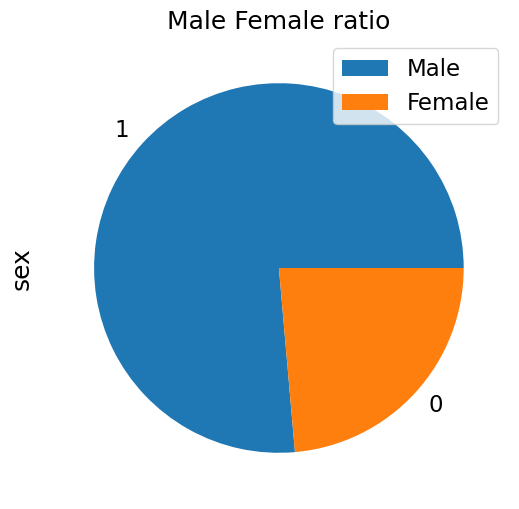

In [57]:
data.sex.value_counts().plot(kind = 'pie', figsize = (8, 6))
plt.title('Male Female ratio')
plt.legend(['Male', 'Female']);

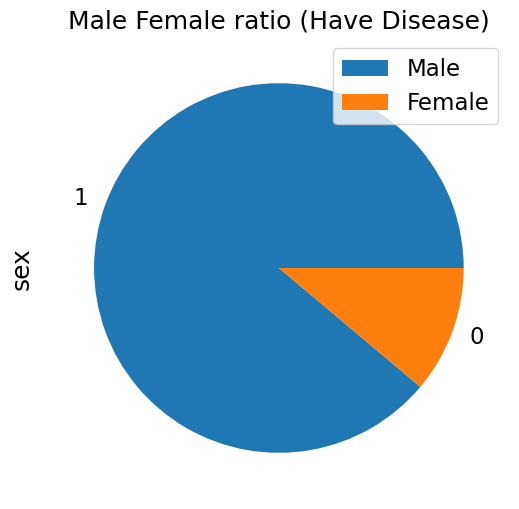

In [55]:
data.sex[data.target==1].value_counts().plot(kind = 'pie', figsize = (8, 6))
plt.title('Male Female ratio (Have Disease)')
plt.legend(['Male', 'Female']);

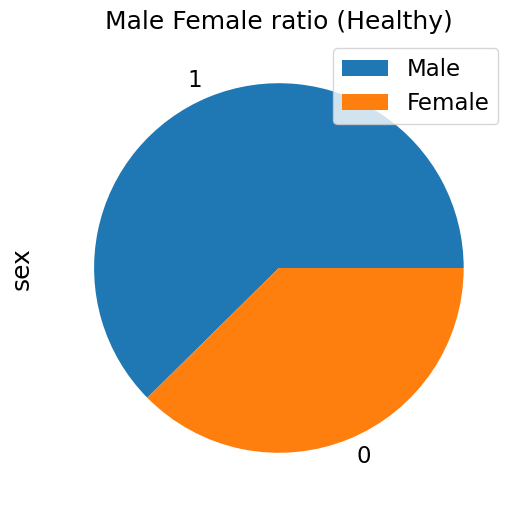

In [58]:
data.sex[data.target==0].value_counts().plot(kind = 'pie', figsize = (8, 6))
plt.title('Male Female ratio (Healthy)')
plt.legend(['Male', 'Female']);

Text(0.5, 0, '0 = No heart Disease, 1 = Heart Disease')

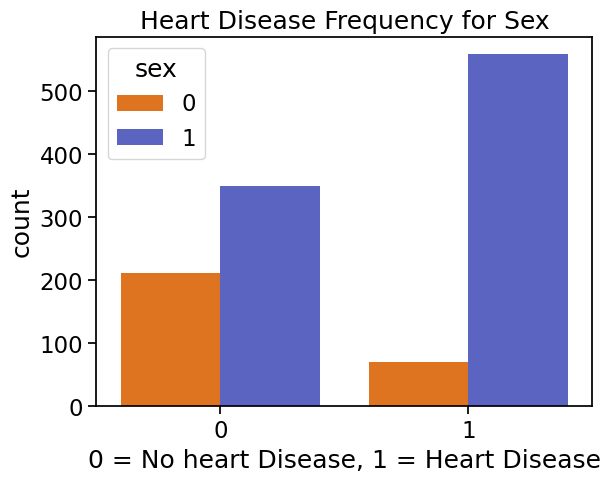

In [53]:
sns.countplot(x = 'target', data = data, hue = 'sex', palette=['#FF7000',"#4B56D2"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No heart Disease, 1 = Heart Disease")

### Chest pain type analysis

Text(0.5, 0, 'Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic')

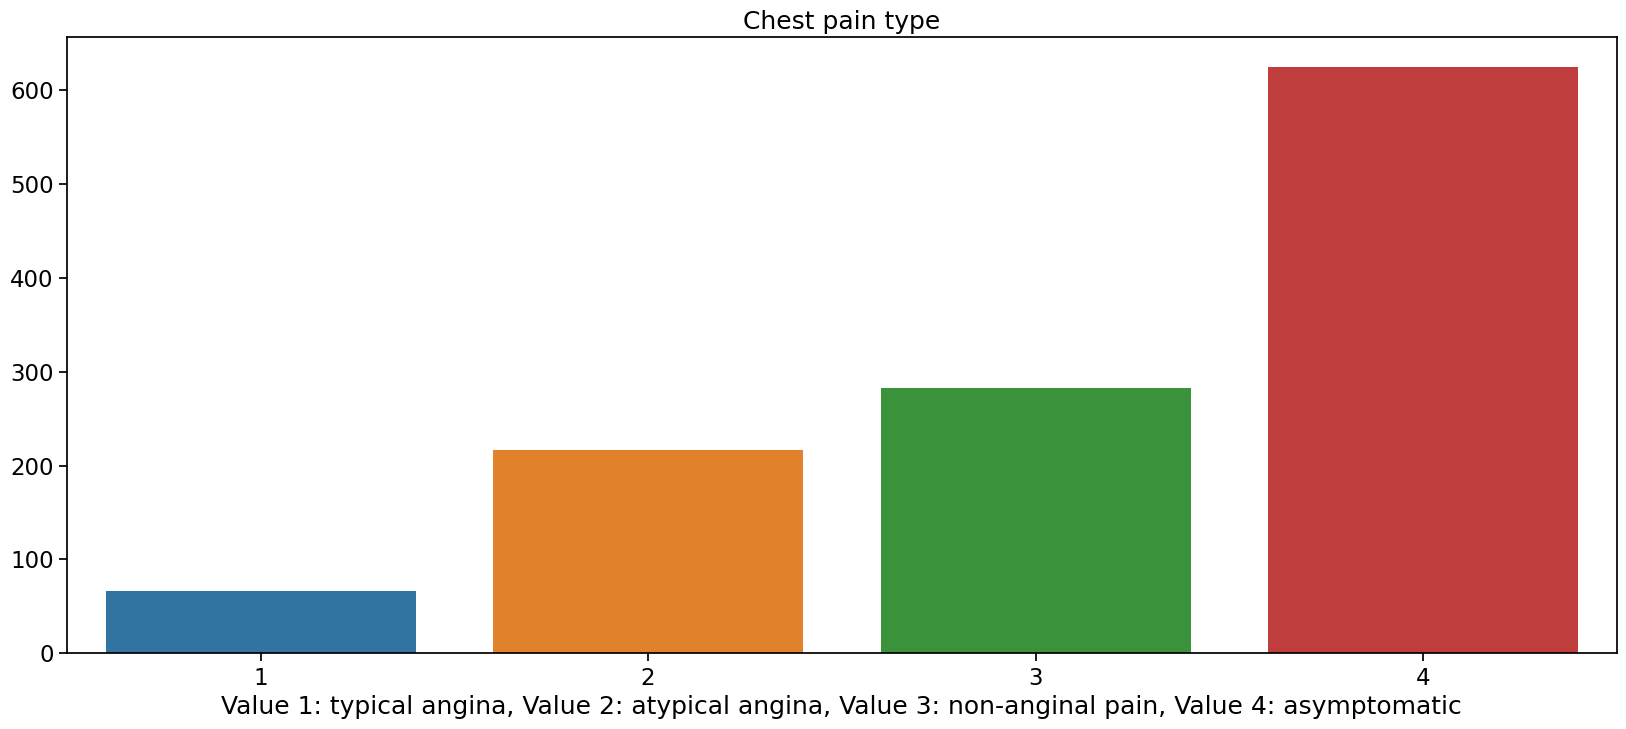

In [62]:
plt.figure(figsize=(20,8))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=data["chest pain type"].value_counts().index,y=data["chest pain type"].value_counts().values)
plt.title("Chest pain type")
plt.xlabel("Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic")

Text(0.5, 0, 'Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic')

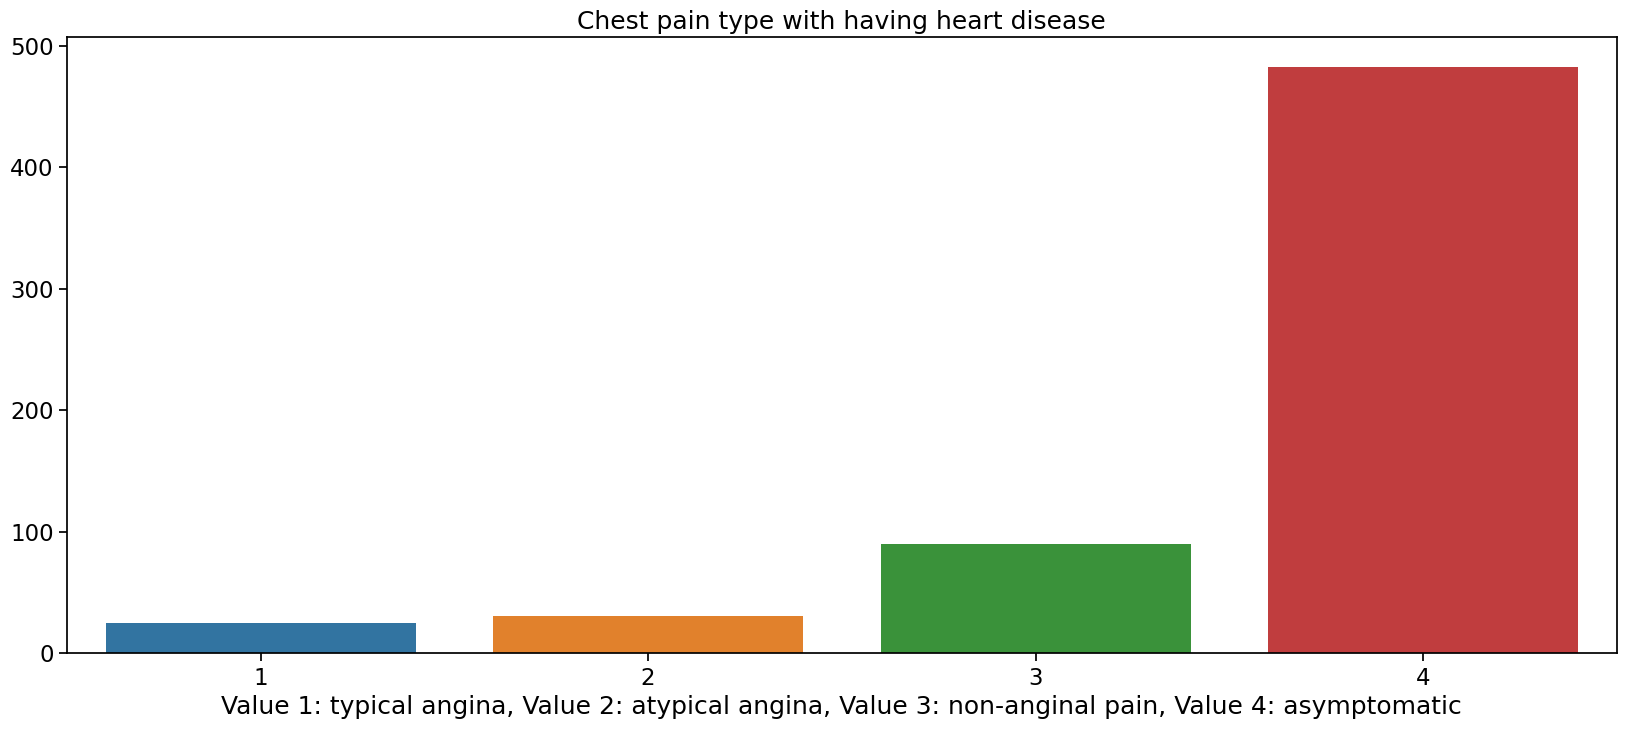

In [61]:
plt.figure(figsize=(20,8))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=data[data.target==1]["chest pain type"].value_counts().index,y=data[data.target==1]["chest pain type"].value_counts().values)
plt.title("Chest pain type with having heart disease")
plt.xlabel("Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic")

Text(0.5, 0, 'Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic')

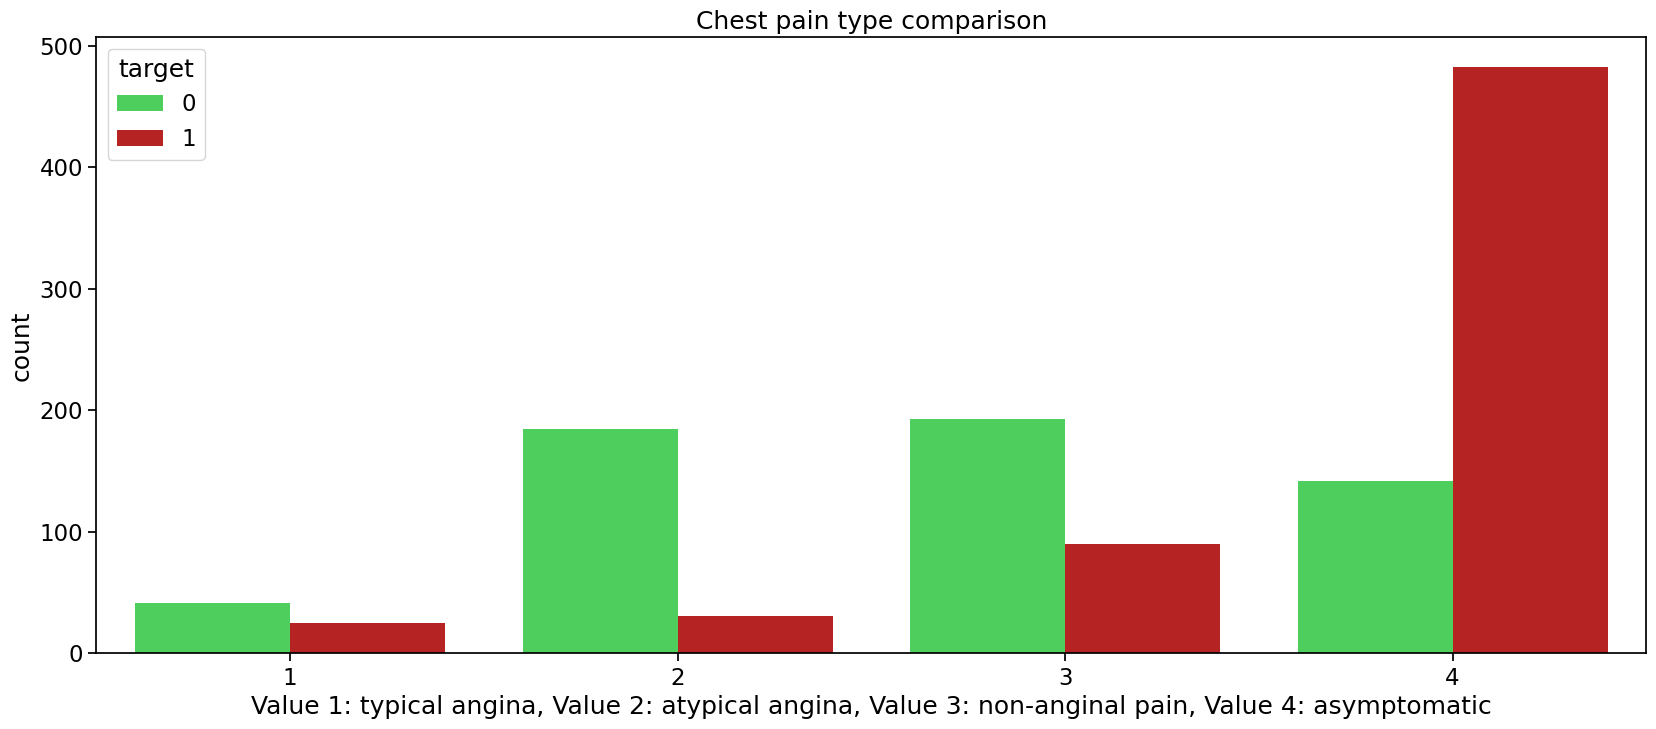

In [63]:
plt.figure(figsize=(20,8))
sns.countplot(x = 'chest pain type', data = data, hue = 'target', palette=['#38E54D',"#CF0A0A"])
plt.title("Chest pain type comparison")
plt.xlabel("Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic")

We can say that having a asymptomatic chest pain type significantly effecs suffering from heart disease

### Resting Blood Pressure Analysis

Text(0.5, 1.0, 'Resting Blood Pressure')

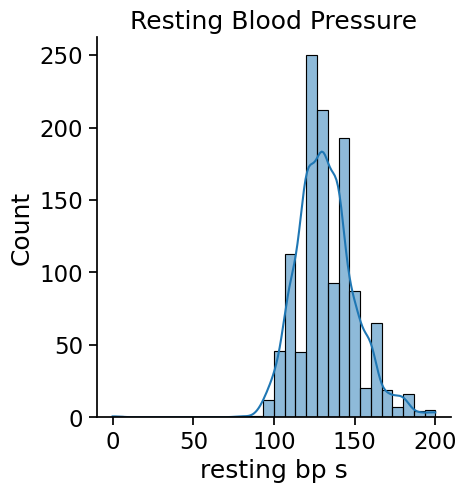

In [71]:
sns.displot( x = 'resting bp s', data = data, bins = 30, kde = True);
plt.title("Resting Blood Pressure")

Text(0.5, 1.0, 'Resting Blood Pressure (Have Disease)')

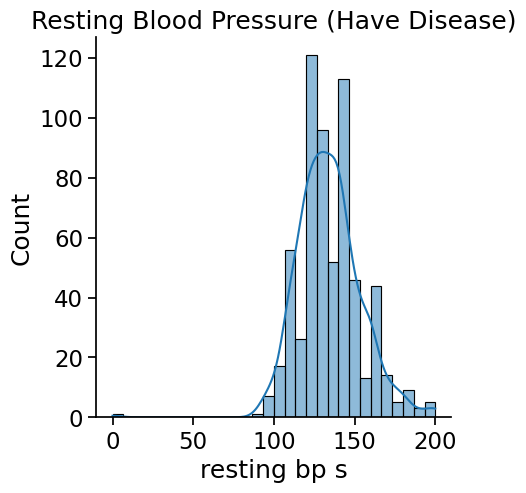

In [73]:
sns.displot( x = 'resting bp s', data = data[data.target==1], bins = 30, kde = True);
plt.title("Resting Blood Pressure (Have Disease)")

### Fasting blood sugar analysis

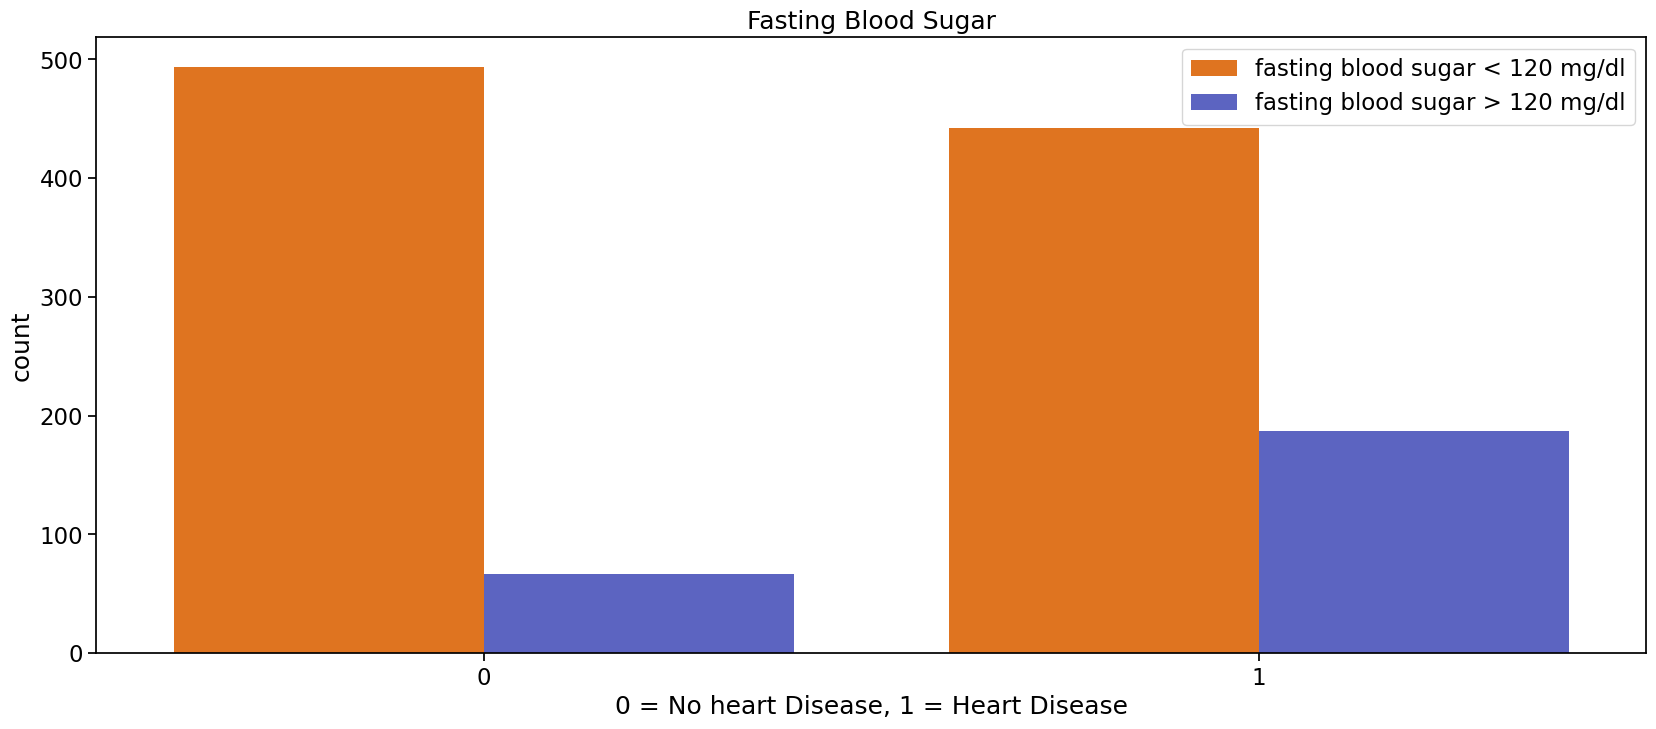

In [95]:
plt.figure(figsize=(20,8))
sns.countplot(x = 'target', data = data, hue = 'fasting blood sugar', palette=['#FF7000',"#4B56D2"])
plt.title("Fasting Blood Sugar")
plt.xlabel("0 = No heart Disease, 1 = Heart Disease")
plt.legend(["fasting blood sugar < 120 mg/dl","fasting blood sugar > 120 mg/dl"])

### Analysis of resting electrocardiogram results

Text(0.5, 0, 'Value 0: normal, Value 1: having ST-T wave abnormality , Value 2: showing probable or definite left ventricular hypertrophy')

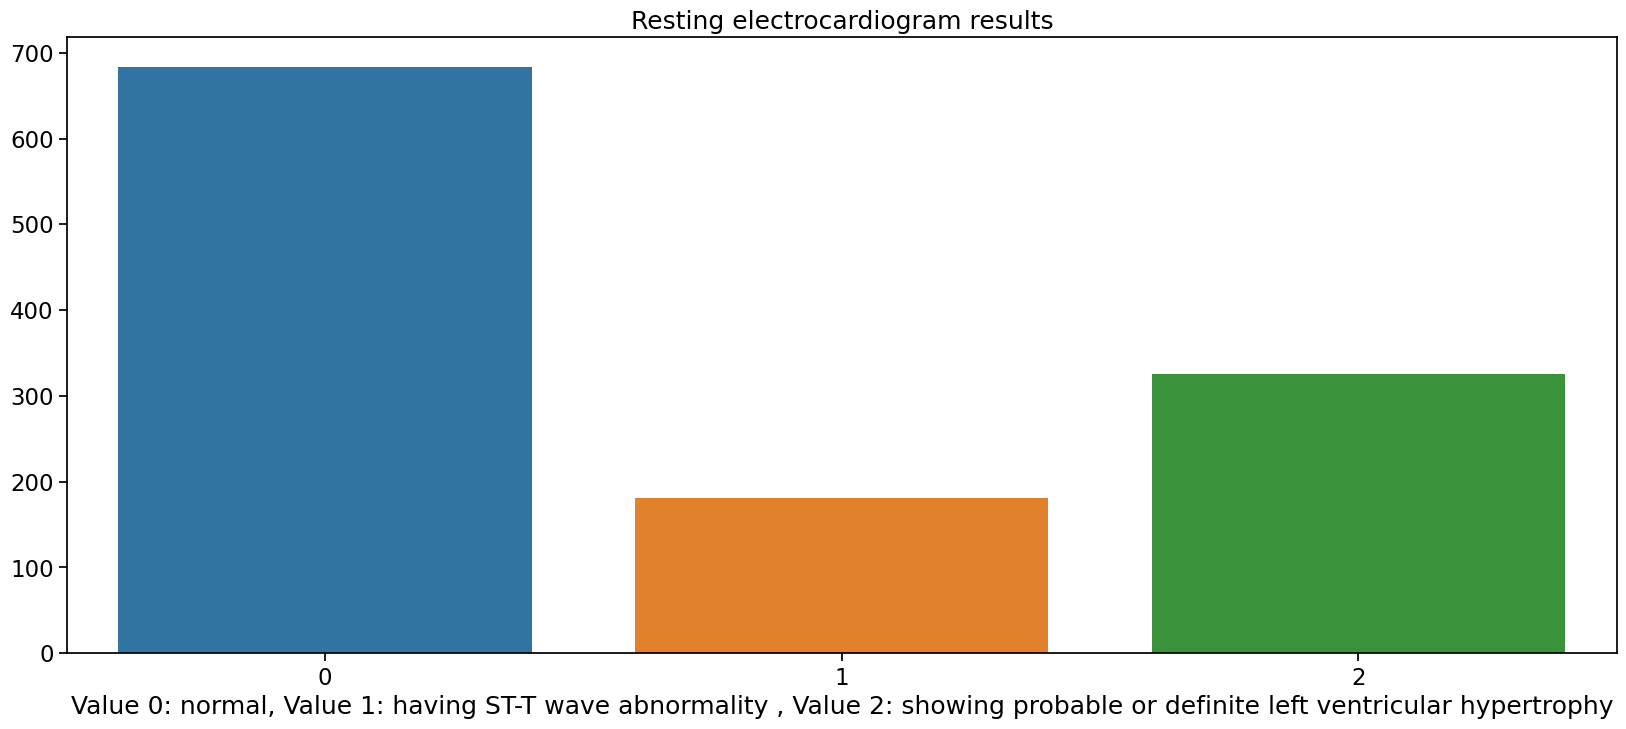

In [88]:
plt.figure(figsize=(20,8))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=data["resting ecg"].value_counts().index,y=data["resting ecg"].value_counts().values)
plt.title("Resting electrocardiogram results")
plt.xlabel("Value 0: normal, Value 1: having ST-T wave abnormality , Value 2: showing probable or definite left ventricular hypertrophy")

Text(0.5, 0, 'Value 0: normal, Value 1: having ST-T wave abnormality , Value 2: showing probable or definite left ventricular hypertrophy')

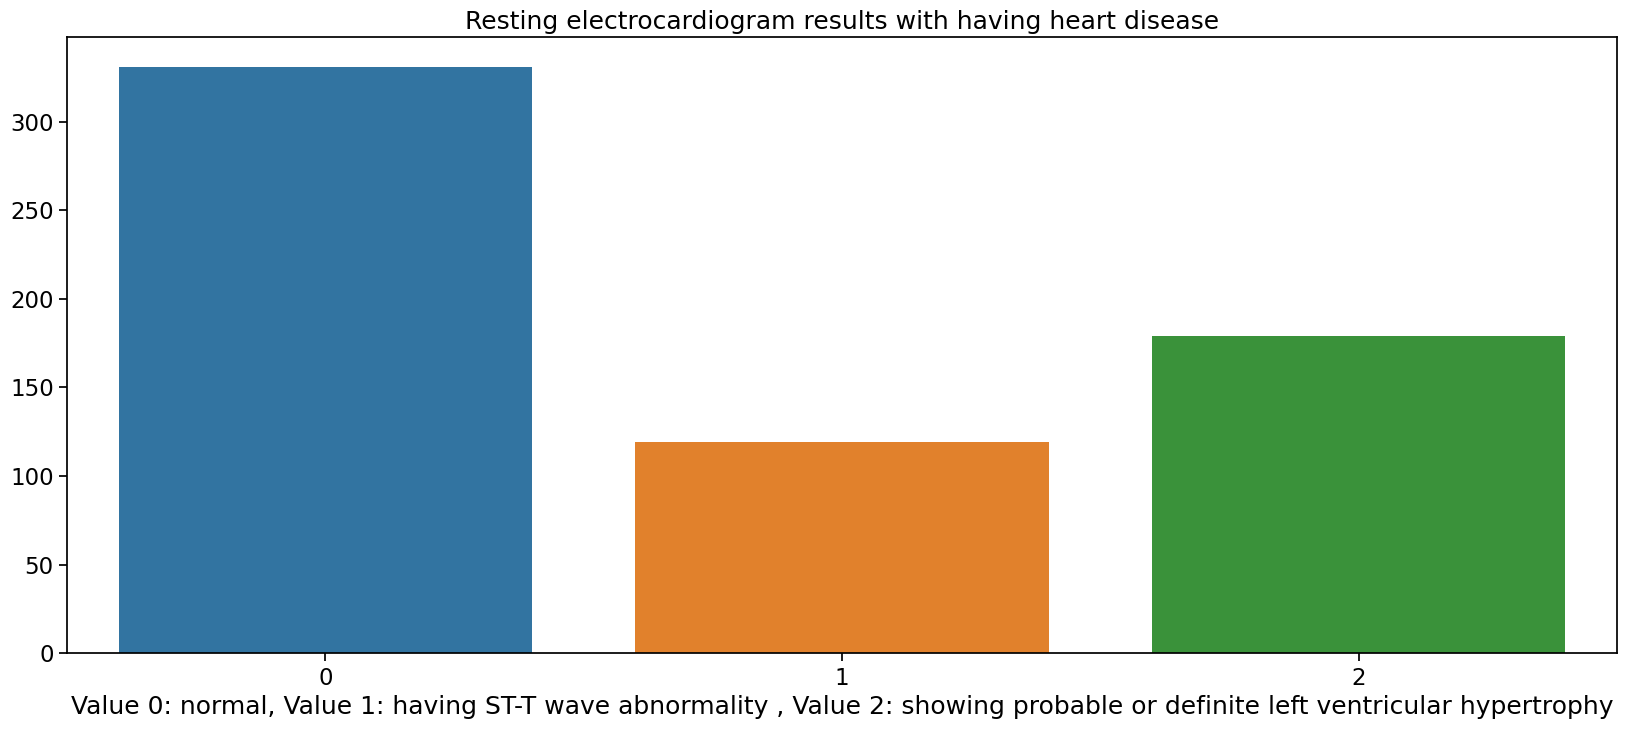

In [89]:
plt.figure(figsize=(20,8))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=data[data.target==1]["resting ecg"].value_counts().index,y=data[data.target==1]["resting ecg"].value_counts().values)
plt.title("Resting electrocardiogram results with having heart disease")
plt.xlabel("Value 0: normal, Value 1: having ST-T wave abnormality , Value 2: showing probable or definite left ventricular hypertrophy")

Text(0.5, 0, 'Value 0: normal, Value 1: having ST-T wave abnormality , Value 2: showing probable or definite left ventricular hypertrophy')

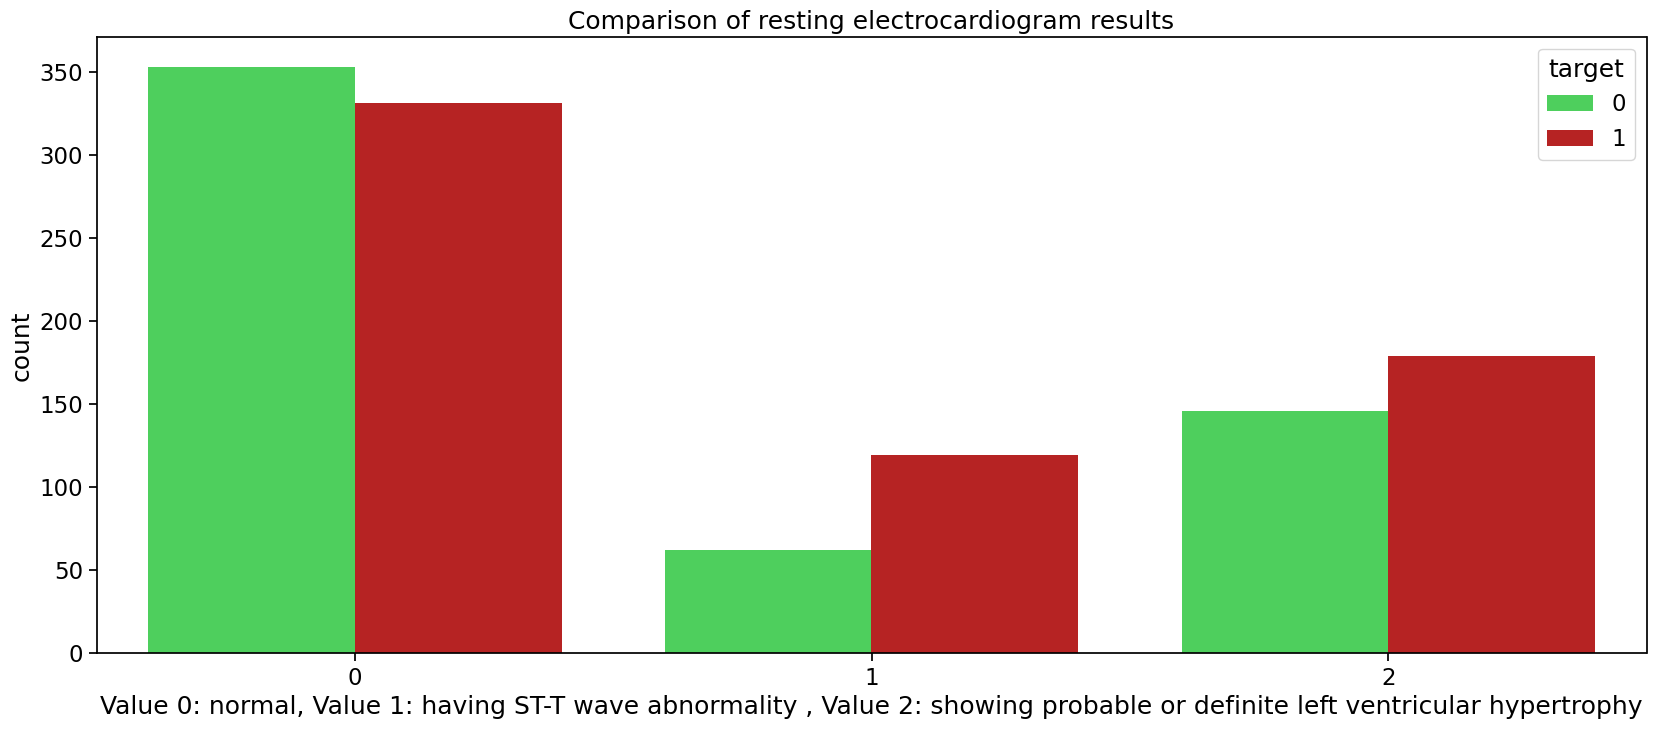

In [90]:
plt.figure(figsize=(20,8))
sns.countplot(x = 'resting ecg', data = data, hue = 'target', palette=['#38E54D',"#CF0A0A"])
plt.title("Comparison of resting electrocardiogram results")
plt.xlabel("Value 0: normal, Value 1: having ST-T wave abnormality , Value 2: showing probable or definite left ventricular hypertrophy")

### Analysis of maximum heart rate achieved

Text(0.5, 1.0, 'maximum heart rate achieved')

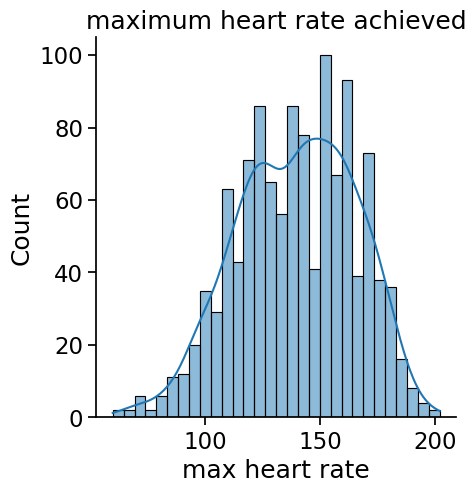

In [77]:
sns.displot( x = 'max heart rate', data = data, bins = 30, kde = True);
plt.title("maximum heart rate achieved")

Text(0.5, 1.0, 'maximum heart rate achieved (have disease)')

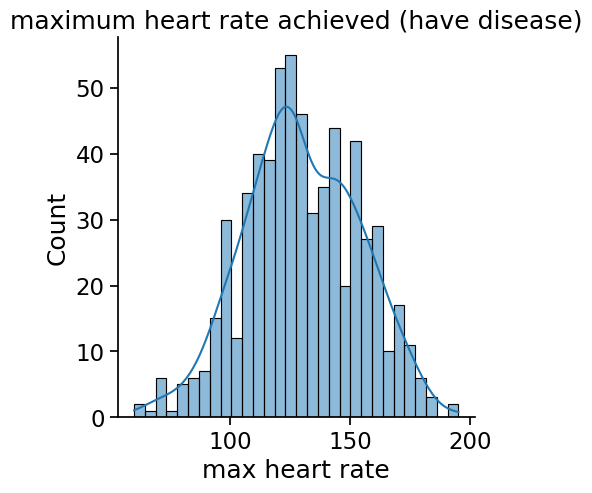

In [78]:
sns.displot( x = 'max heart rate', data = data[data.target==1], bins = 30, kde = True);
plt.title("maximum heart rate achieved (have disease)")

 ### Exercise induced angina analysis

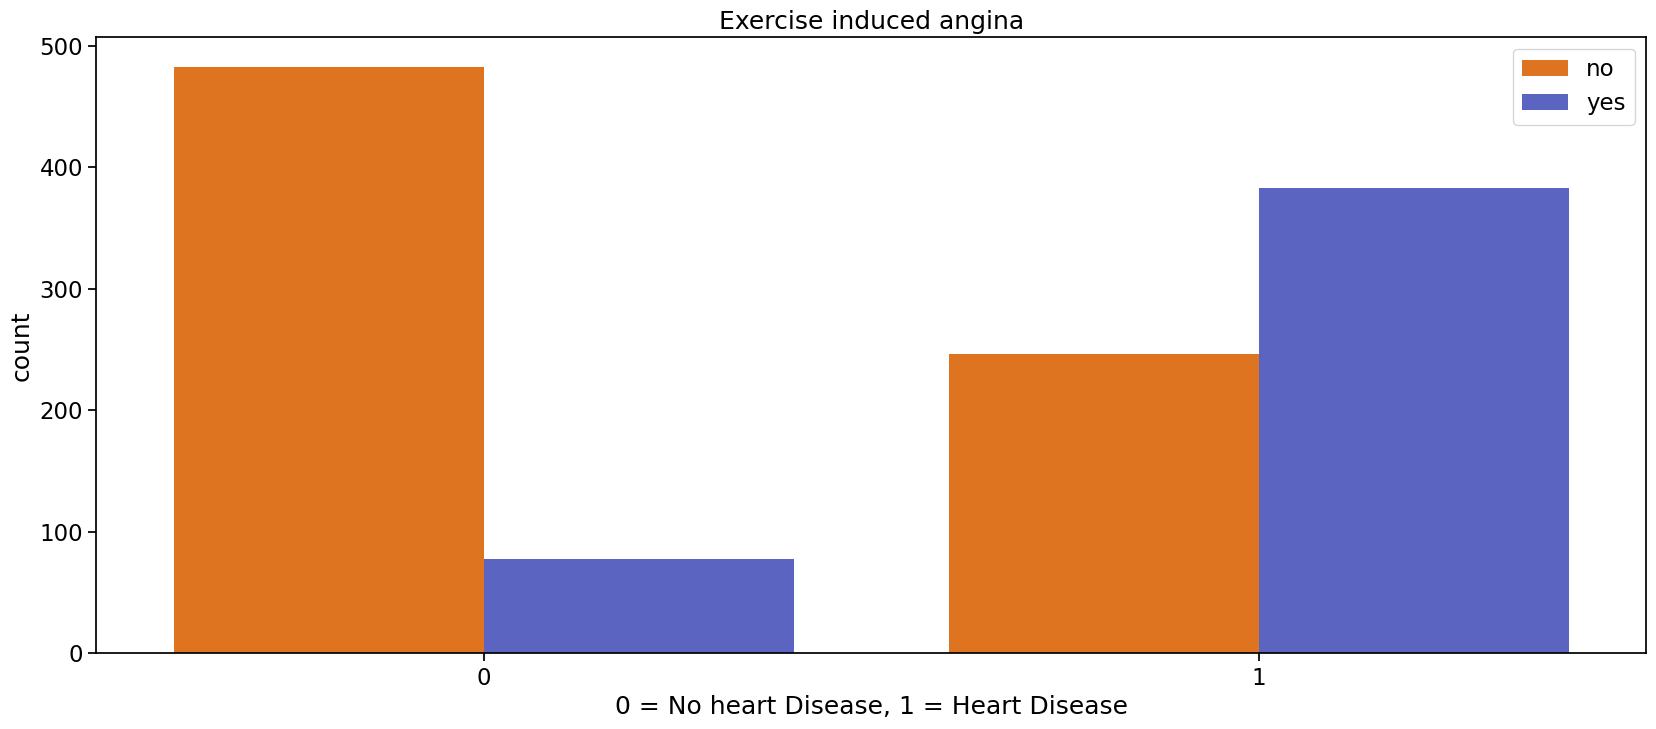

In [93]:
plt.figure(figsize=(20,8))
sns.countplot(x = 'target', data = data, hue = 'exercise angina', palette=['#FF7000',"#4B56D2"])
plt.title("Exercise induced angina")
plt.xlabel("0 = No heart Disease, 1 = Heart Disease")
plt.legend(["no","yes"])

### Oldpeak analysis 

Text(0.5, 1.0, 'oldpeak =ST')

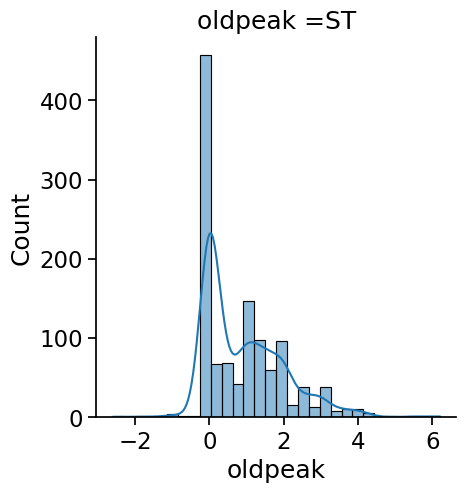

In [79]:
sns.displot( x = 'oldpeak', data = data, bins = 30, kde = True);
plt.title("oldpeak =ST")

Text(0.5, 1.0, 'oldpeak =ST (have disease)')

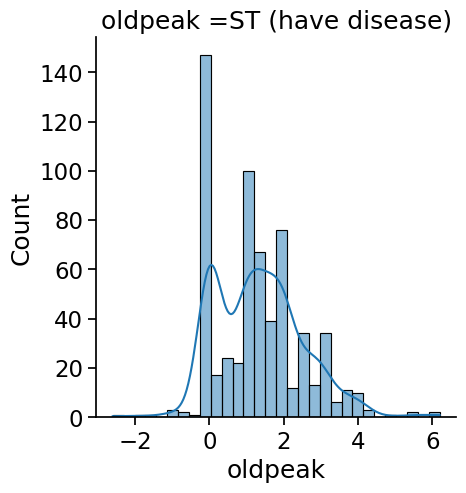

In [80]:
sns.displot( x = 'oldpeak', data = data[data.target==1], bins = 30, kde = True);
plt.title("oldpeak =ST (have disease)")

 ### Analysis of the slope of the peak exercise ST segment

Text(0.5, 0, 'Value 1: upsloping, Value 2: flat , Value 3: downsloping')

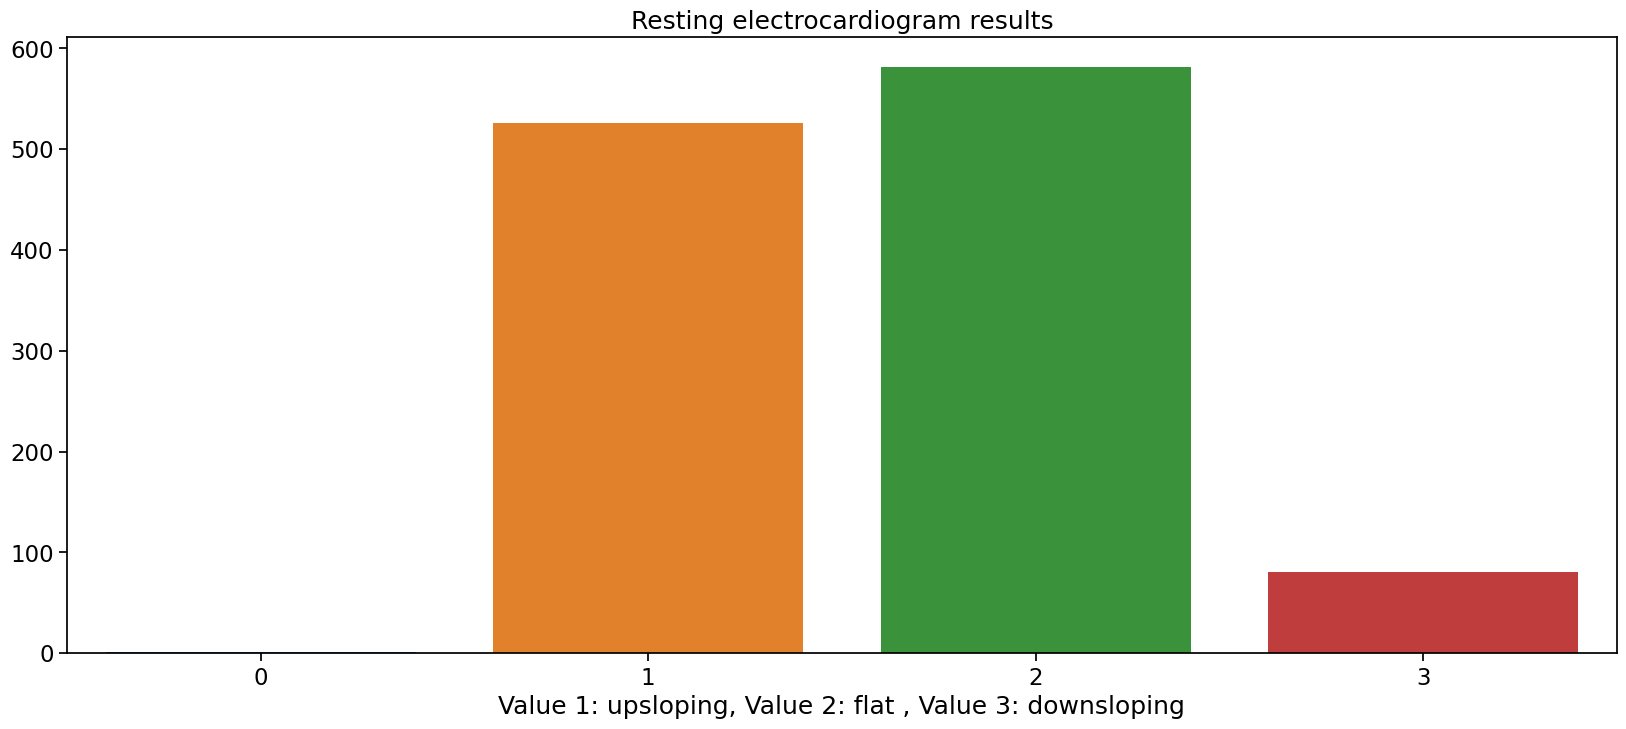

In [105]:
plt.figure(figsize=(20,8))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=data["ST slope"].value_counts().index,y=data["ST slope"].value_counts().values)
plt.title("Resting electrocardiogram results")
plt.xlabel("Value 1: upsloping, Value 2: flat , Value 3: downsloping")

Text(0.5, 0, 'Value 1: upsloping, Value 2: flat , Value 3: downsloping')

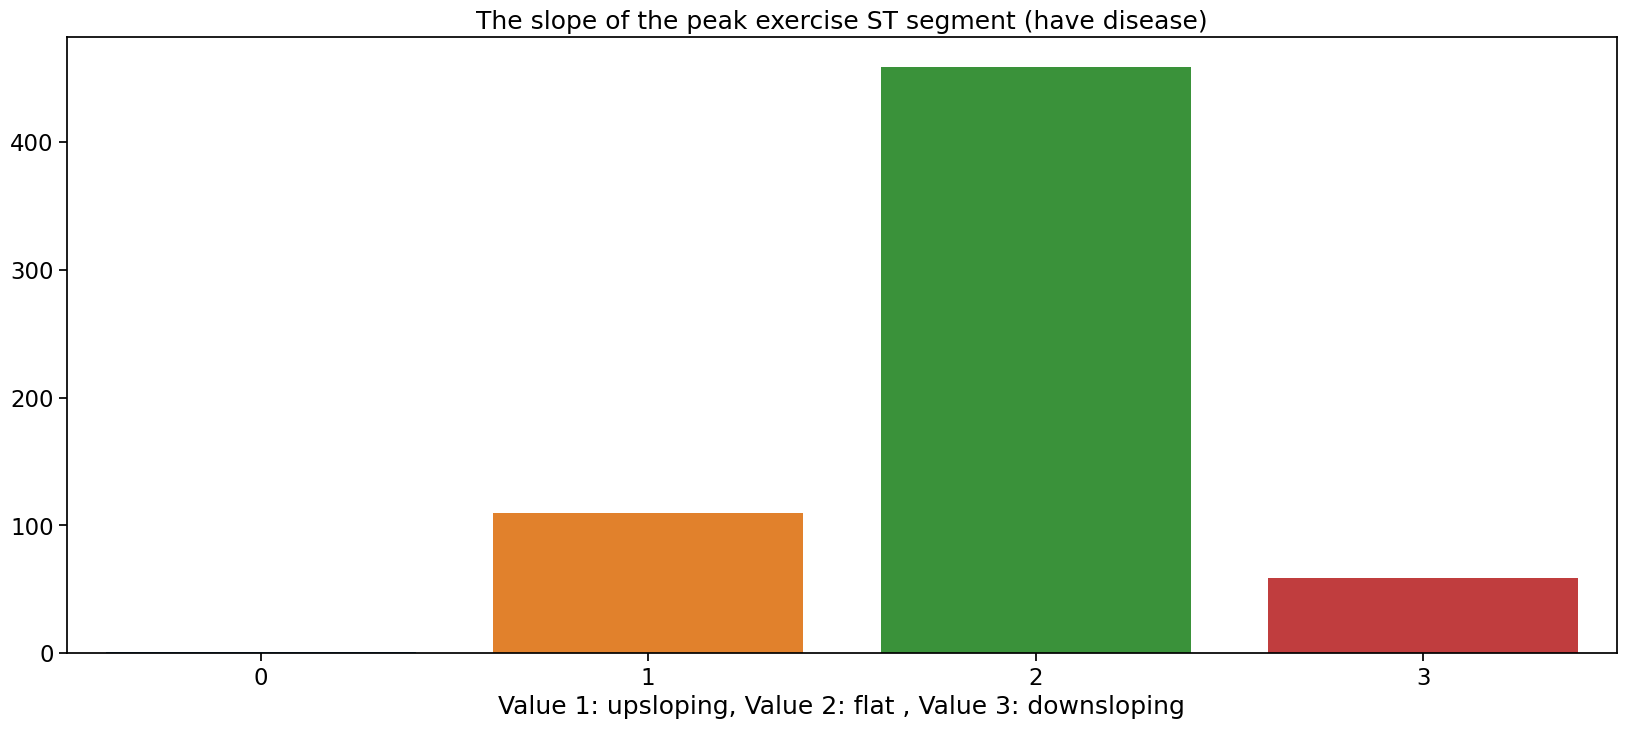

In [104]:
plt.figure(figsize=(20,8))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=data[data.target==1]["ST slope"].value_counts().index,y=data[data.target==1]["ST slope"].value_counts().values)
plt.title("The slope of the peak exercise ST segment (have disease)")
plt.xlabel("Value 1: upsloping, Value 2: flat , Value 3: downsloping")

Text(0.5, 0, 'Value 1: upsloping, Value 2: flat , Value 3: downsloping')

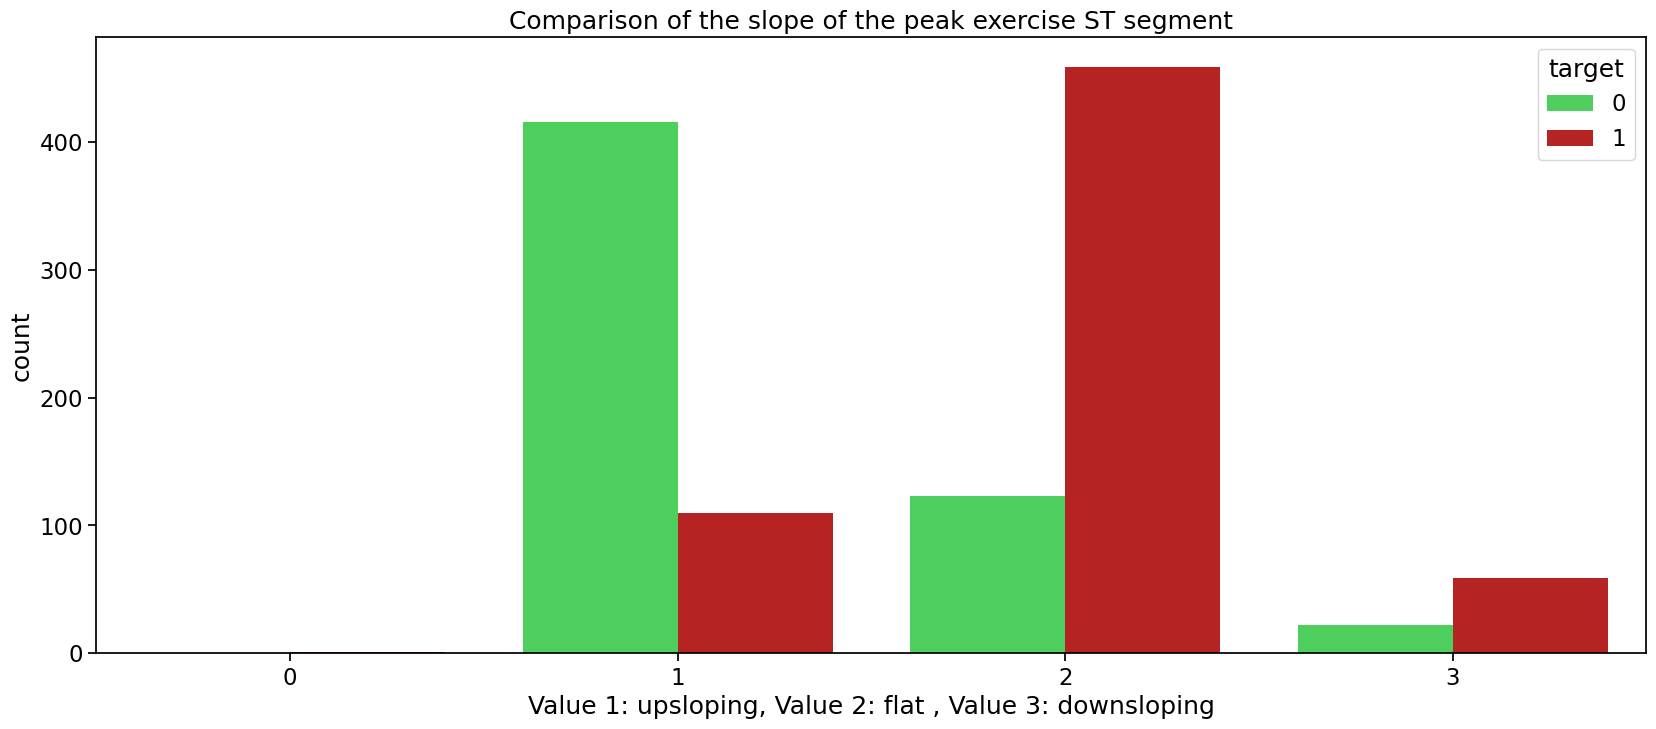

In [106]:
plt.figure(figsize=(20,8))
sns.countplot(x = 'ST slope', data = data, hue = 'target', palette=['#38E54D',"#CF0A0A"])
plt.title("Comparison of the slope of the peak exercise ST segment")
plt.xlabel("Value 1: upsloping, Value 2: flat , Value 3: downsloping")

In [117]:
len(data[data["ST slope"]==0])

1

# End of plotting. detecting outliers

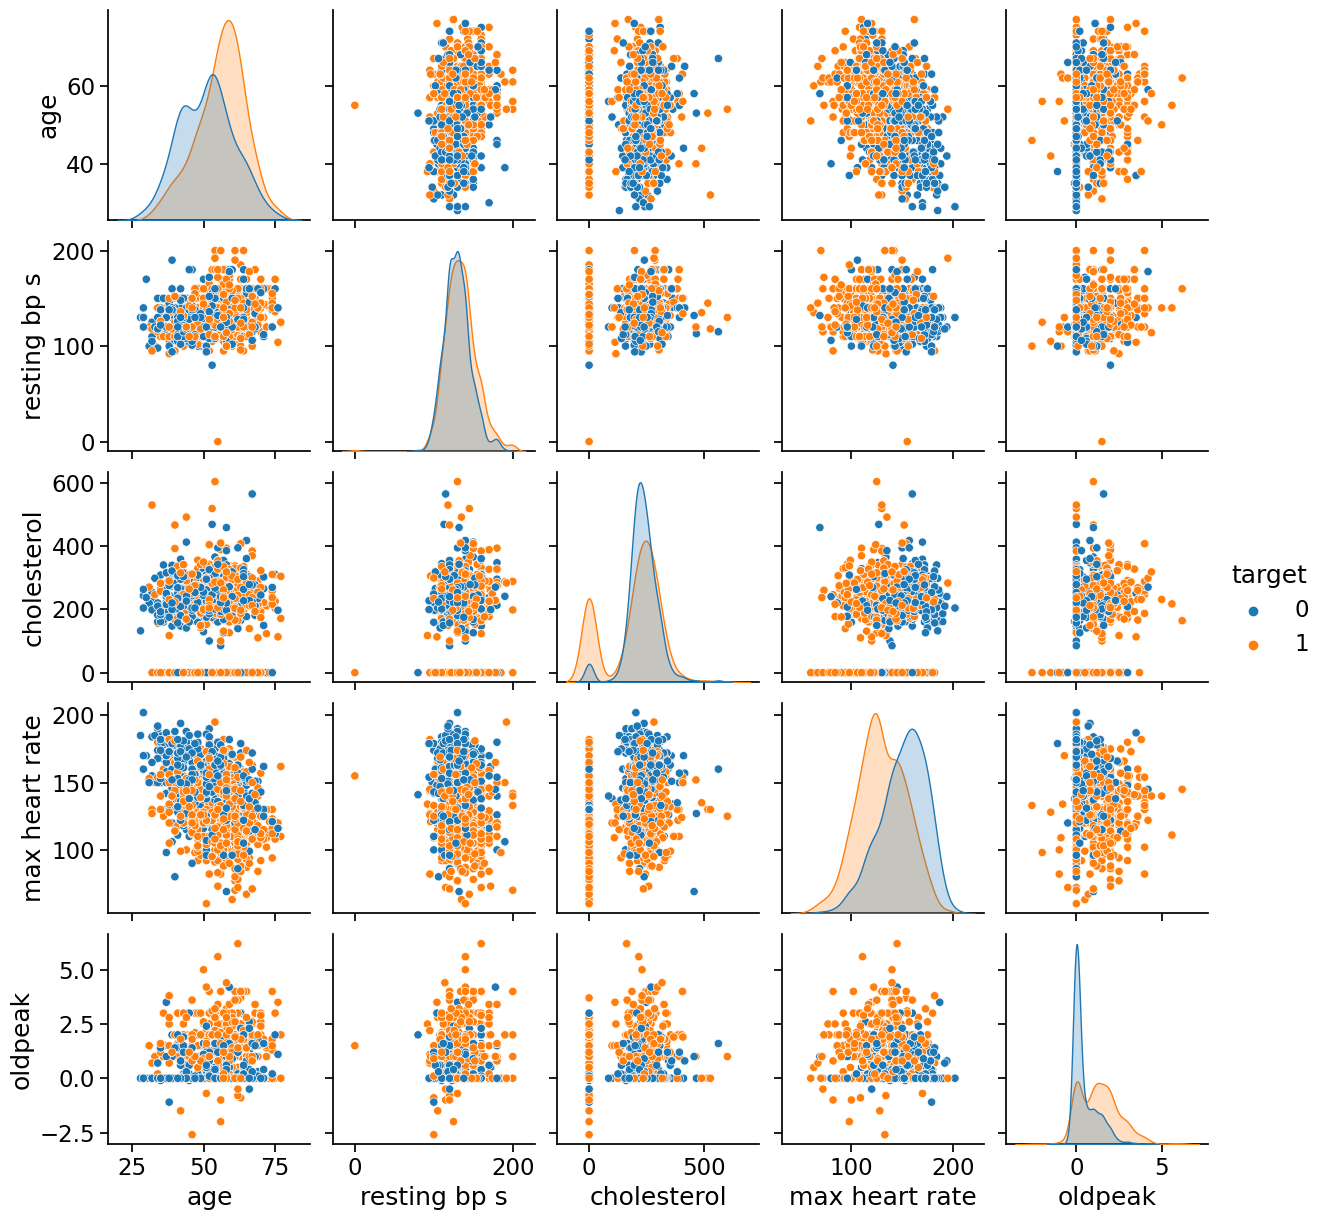

In [15]:
sns.pairplot(data, hue = 'target', vars = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak'] )